In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../')
from M1S_tools import *

plt.jet()

%matplotlib inline

## bending modes & influence matrices etc from Buddy #####################
ML actuators =  165 165
Afn =  (6991, 165)
fv =  (165, 165)
U matrix (6991, 165)
N node =  6991
## bending modes & influence matrices etc from Trupti #####################
N actuators =  170
Afz =  (27685, 170)
Afx =  (27685, 170)
Afy =  (27685, 170)
U matrix (27685, 170)
V matrix (170, 170)
S matrix (170, 170)
N node =  27685
number of Mirror Front surface TCs =  48
number of Mirror Back surface TCs =  48
number of Mirror Middle TCs =  16


<Figure size 640x480 with 0 Axes>

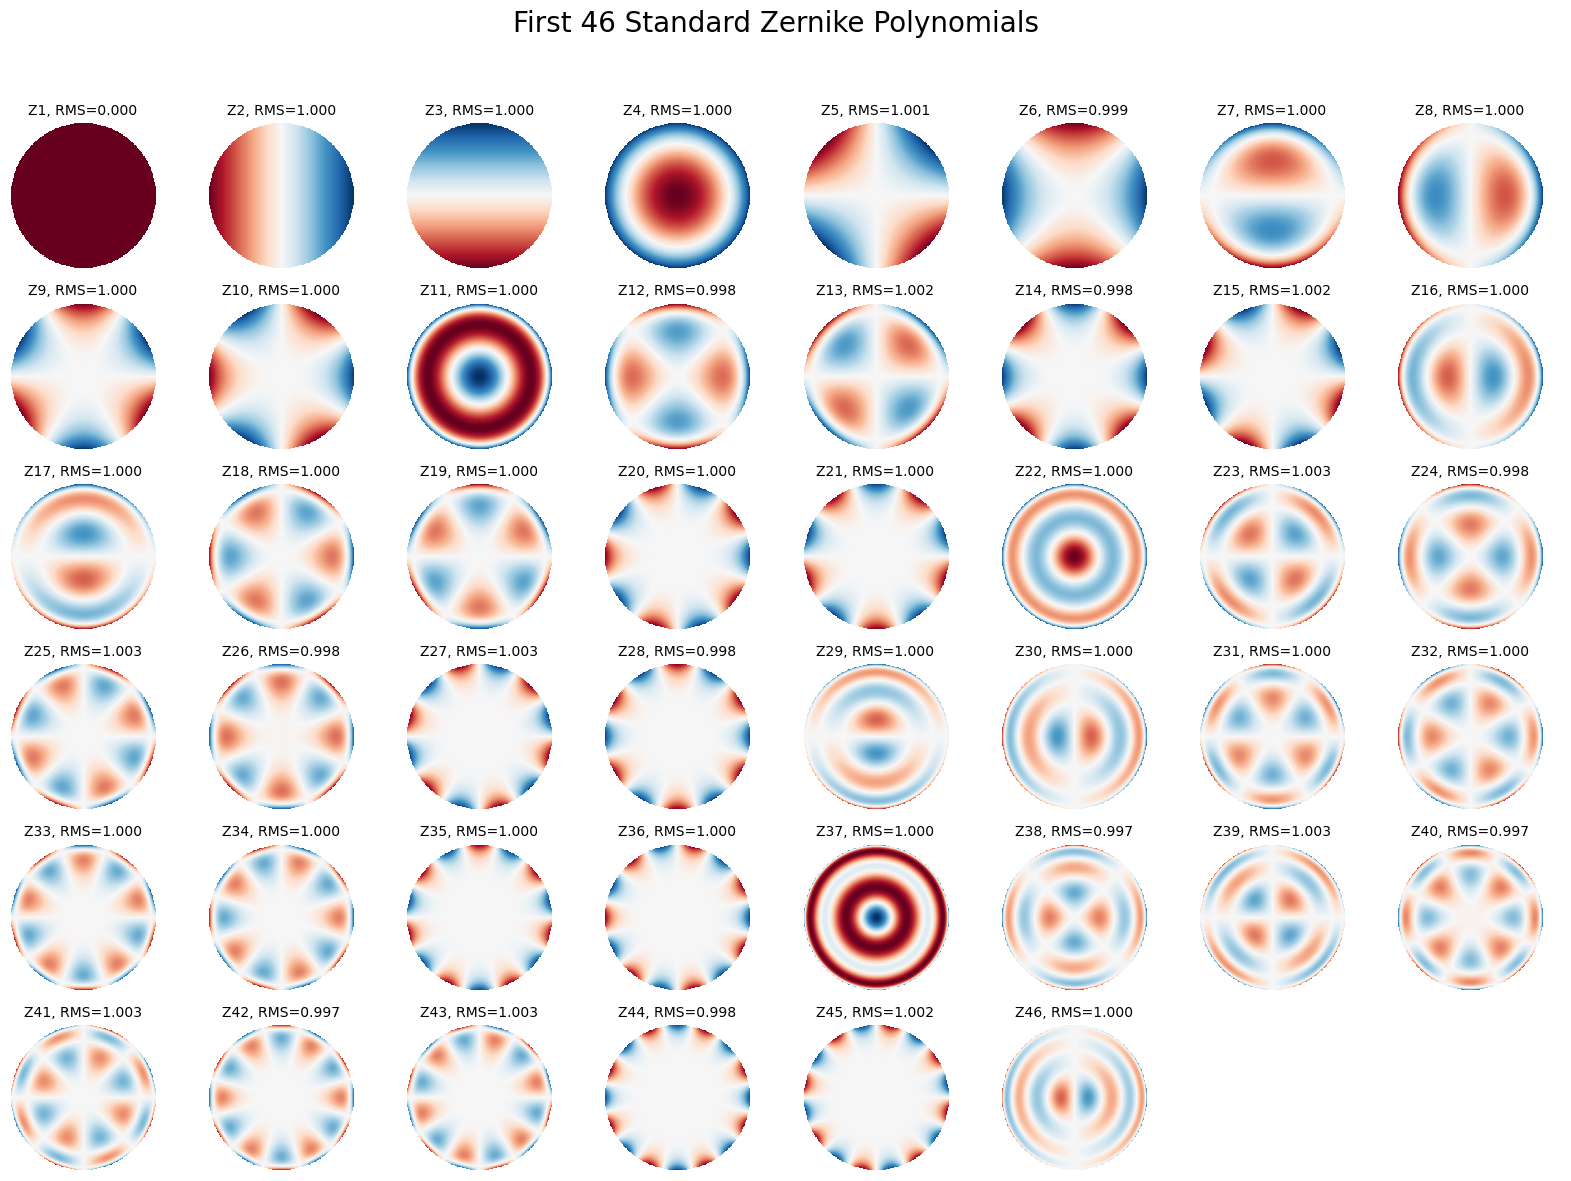

In [39]:
grid_size = 201

zarray = np.zeros((grid_size, grid_size, 46))

x = np.linspace(-1, 1, grid_size)
y = np.linspace(-1, 1, grid_size)
X, Y = np.meshgrid(x, y)

fig, axes = plt.subplots(6, 8, figsize=(16, 12))
fig.suptitle("First 46 Standard Zernike Polynomials", fontsize=20)

# Loop through the first 46 Zernike polynomials (Noll indices 1 to 46)
for N in range(1, 47):
    
    # Calculate Zernike polynomial for the current Noll index
    Z = zernike_polynomial(N, X, Y)
    #print(N, n, m)
    zarray[:,:,N-1] = Z
    
    # Compute the RMS of the polynomial
    rms = np.std(Z[~np.isnan(Z)])
    
    # Plot the Zernike polynomial in the corresponding subplot
    ax = axes[(N - 1) // 8, (N - 1) % 8]
    im = ax.imshow(Z, extent=(-1, 1, -1, 1), cmap='RdBu', origin='lower')
    ax.set_title(f"Z{N}, RMS={rms:.3f}", fontsize=10)
    ax.axis('off')

# Hide any unused subplots (if any)
for N in range(47, 49):
    ax = axes[(N - 1) // 8, (N - 1) % 8]
    ax.axis('off')

# Adjust layout and display the figure
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Check orthogonality

In [40]:
import random

for i in range(46):
    aa = zarray[:,:,i].reshape((-1,1))
    aa = aa[~np.isnan(aa)]
    randomb = random.choice([x for x in range(46) if x != i])
    bb = zarray[:,:,randomb].reshape((-1,1))
    bb = bb[~np.isnan(bb)]
    #print('%.2f'%np.sqrt(np.mean(aa**2)))
    print('%2d, %2d, %+8.3f, %+8.3f'%(i, randomb, np.dot(aa,bb), np.mean(np.multiply(aa,bb))))
#with higher order zernikes, numerical noise will show up. 
#for example, a "high" feature around 0 deg is supposed to cancel a "low" feature around 45 deg.
# by eye, it looks like they should cancel. But, we are on a square grid, due to limited resolution, i.e.,
# how we are sampling the "low" and "high" bumps, they will not cancel exactly. 
# this kind of effect adds up when you have tens of thousands of points.

#if we want to test it out, switching to polar coordinate should help. But it will be just for a test.
# in reality, we will mostly work with cartesian grids, or in some cases, irregular grid defined by a FEM.

 0, 27,   -0.000,   +0.000
 1, 23,   +0.000,   +0.000
 2, 28,   +6.324,   +0.000
 3, 14,   -0.000,   +0.000
 4,  9,   -0.000,   +0.000
 5,  3,   -0.000,   +0.000
 6, 18, +109.557,   +0.003
 7, 11,   +0.000,   +0.000
 8, 25,   -0.000,   -0.000
 9, 34,   -0.000,   -0.000
10, 23,   -0.000,   +0.000
11, 40,   -0.000,   -0.000
12, 17,   -0.000,   -0.000
13, 34,   +0.000,   +0.000
14, 29,   +0.000,   -0.000
15,  5,   +0.000,   +0.000
16, 32, -152.140,   -0.005
17, 31,  +11.879,   +0.000
18, 31,   -0.000,   -0.000
19, 11,   -0.000,   -0.000
20,  2,  -78.654,   -0.003
21, 39, -240.655,   -0.008
22, 21,   -0.000,   -0.000
23, 15,   +0.000,   +0.000
24, 13,   -0.000,   -0.000
25, 34,   +0.000,   +0.000
26,  5,   -0.000,   -0.000
27, 21,   +0.000,   +0.000
28, 40,   +0.000,   +0.000
29,  4,   +0.000,   +0.000
30, 44,   -0.000,   -0.000
31, 22,   -0.000,   -0.000
32, 11,   +0.000,   +0.000
33, 45, -188.944,   -0.006
34, 26,   +0.000,   +0.000
35, 21,   -0.000,   -0.000
36, 32,   -0.000,   -0.000
3

-139.04262336441644


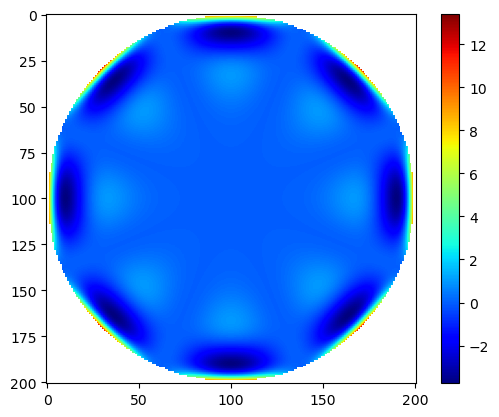

In [42]:
i1 = 13
i2 = 39
zz = np.multiply(zarray[:,:,i1], zarray[:,:,i2])
#the point is if this looks to have a symmetry,then the positives should cancel the negatives when we take the sum
#does it look to have the symmetry? yes. but below we see the sum is not exactly zero... 
#this is due to limited sampling..
plt.imshow(zz) 
plt.colorbar();
mask = ~np.isnan(zz)
print(np.sum(zz[mask]))

In [43]:
x

array([-1.  , -0.99, -0.98, -0.97, -0.96, -0.95, -0.94, -0.93, -0.92,
       -0.91, -0.9 , -0.89, -0.88, -0.87, -0.86, -0.85, -0.84, -0.83,
       -0.82, -0.81, -0.8 , -0.79, -0.78, -0.77, -0.76, -0.75, -0.74,
       -0.73, -0.72, -0.71, -0.7 , -0.69, -0.68, -0.67, -0.66, -0.65,
       -0.64, -0.63, -0.62, -0.61, -0.6 , -0.59, -0.58, -0.57, -0.56,
       -0.55, -0.54, -0.53, -0.52, -0.51, -0.5 , -0.49, -0.48, -0.47,
       -0.46, -0.45, -0.44, -0.43, -0.42, -0.41, -0.4 , -0.39, -0.38,
       -0.37, -0.36, -0.35, -0.34, -0.33, -0.32, -0.31, -0.3 , -0.29,
       -0.28, -0.27, -0.26, -0.25, -0.24, -0.23, -0.22, -0.21, -0.2 ,
       -0.19, -0.18, -0.17, -0.16, -0.15, -0.14, -0.13, -0.12, -0.11,
       -0.1 , -0.09, -0.08, -0.07, -0.06, -0.05, -0.04, -0.03, -0.02,
       -0.01,  0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,
        0.08,  0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,
        0.17,  0.18,  0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,
        0.26,  0.27,

### try zernike fits

In [44]:
nzer = 100
nnodes = np.sum(mask)
zerU = np.zeros((nnodes, nzer))
for i in range(nzer):
    zerU[:,i] = zernike_polynomial(i+1, X[mask], Y[mask])

[13 82]
[0.99650051 3.02891064]


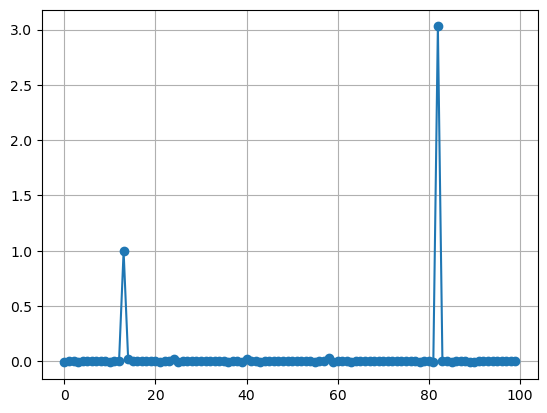

In [53]:
testS = zerU[:,13] + zerU[:,82]*3
aa = zerU.transpose() / zerU.shape[0] @ testS
plt.plot(aa,'-o')
plt.grid()
print(np.where(aa>0.5)[0])
print(aa[np.where(aa>0.5)])
#again, numerical noise creeps in due to limited resolution

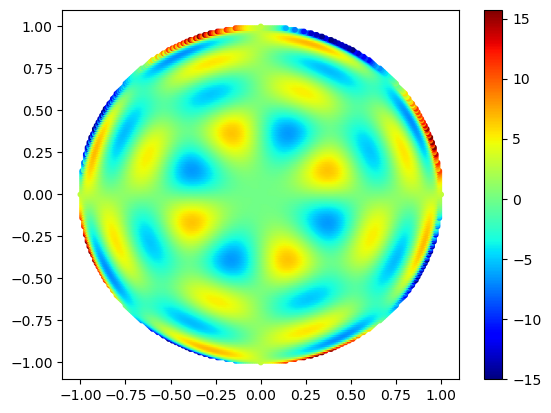

In [55]:
plt.scatter(X[mask], Y[mask], 10, zerU@aa)
plt.colorbar();

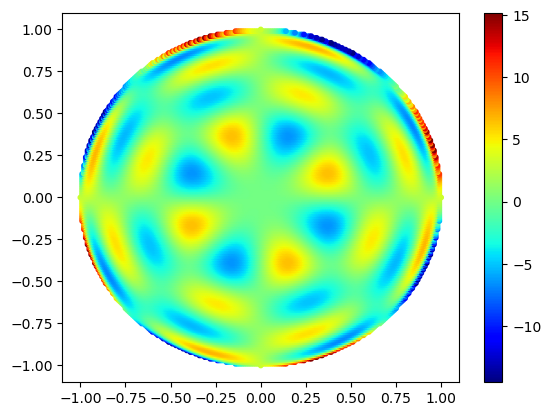

In [56]:
plt.scatter(X[mask], Y[mask], 10, testS)
plt.colorbar();